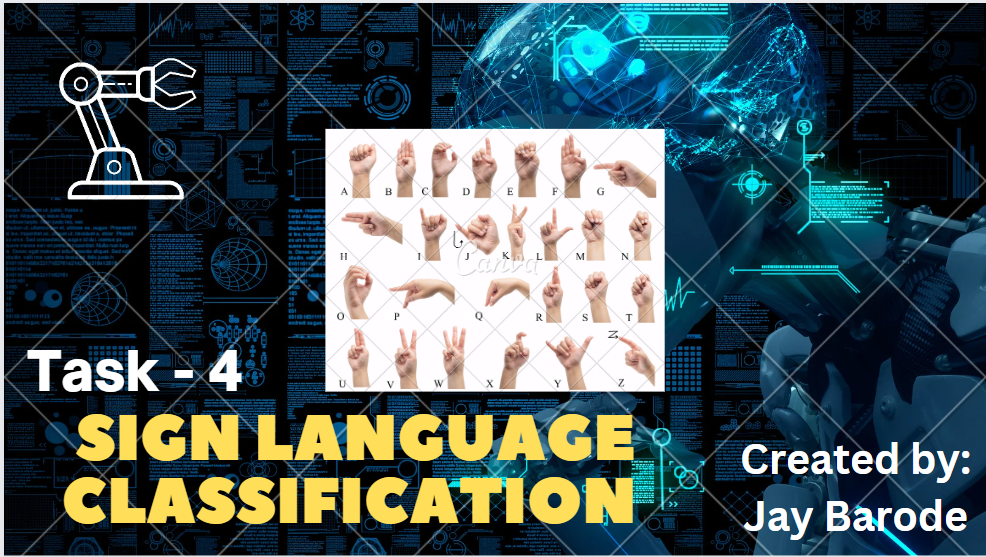

Importing the dependencies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten,Dense,Dropout,MaxPool2D,Conv2D

Loading the dataset

In [40]:
#Loading training data
df_train = pd.read_csv("/content/sign_mnist_train.csv")
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [41]:
#Loading test dataset
df_test = pd.read_csv('/content/sign_mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [3]:
df_train.shape

(2072, 785)

In [4]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,...,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000
mean,12.287645,147.019305,149.948842,152.606660,154.827703,157.500000,159.537645,161.620174,163.442568,165.001931,...,144.440850,150.095123,154.926606,160.026557,162.726702,163.235152,163.711733,163.061806,161.554322,160.446644
std,7.228644,42.248382,41.089229,40.007607,39.215444,37.616454,36.870852,35.555481,34.281007,33.276115,...,64.097844,64.466635,63.403389,63.272341,64.126872,64.024710,63.754227,63.213686,63.082592,63.580501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,123.000000,127.000000,131.000000,134.000000,138.000000,140.000000,142.000000,145.000000,147.000000,...,94.000000,99.000000,105.000000,115.000000,123.000000,127.000000,130.000000,130.500000,128.500000,126.000000
50%,13.000000,152.000000,154.500000,157.000000,159.000000,161.000000,163.000000,164.000000,166.000000,167.000000,...,150.000000,165.000000,174.000000,181.000000,185.000000,185.000000,186.000000,185.000000,183.000000,182.000000
75%,18.000000,176.000000,178.000000,179.000000,181.000000,183.000000,184.000000,185.000000,186.000000,186.000000,...,200.000000,204.000000,205.000000,207.000000,209.000000,208.000000,208.000000,207.000000,205.500000,205.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [8]:
train_label = df_train["label"]
test_label = df_test["label"]

Visualizing the training dataset

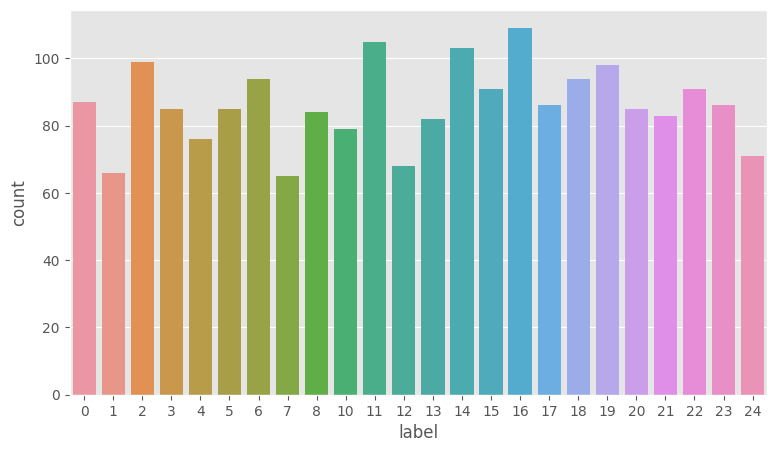

In [45]:
plt.style.use("ggplot")
plt.figure(figsize =(9,5))
sns.countplot(x= df_train['label'],data = df_train)
plt.show()

In [9]:
df_train.drop("label",axis=1,inplace=True)
df_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,155,157,156,156,156,157,156,158,158,157,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,187,188,188,187,187,186,187,188,187,186,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,211,211,212,212,211,210,211,210,210,211,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,164,167,170,172,176,179,180,184,185,186,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [10]:
df_test.drop("label",axis=1,inplace=True)
df_test.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138.0,148.0,127.0,89.0,82.0,96.0,106.0,112.0,120.0,107.0
1,126,128,131,132,133,134,135,135,136,138,...,47.0,104.0,194.0,183.0,186.0,184.0,184.0,184.0,182.0,180.0


In [11]:
x_train = df_train.values

In [12]:
print(x_train)

[[107. 118. 127. ... 204. 203. 202.]
 [155. 157. 156. ... 103. 135. 149.]
 [187. 188. 188. ... 195. 194. 195.]
 ...
 [176. 178. 183. ...  12.  11.  17.]
 [109. 115. 119. ...  43.  30.  41.]
 [ 90.  99. 114. ...  nan  nan  nan]]


In [13]:
x_train = x_train.reshape(-1,28,28,1)
x_test = df_test.values.reshape(-1,28,28,1)

In [14]:
lb = LabelBinarizer()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

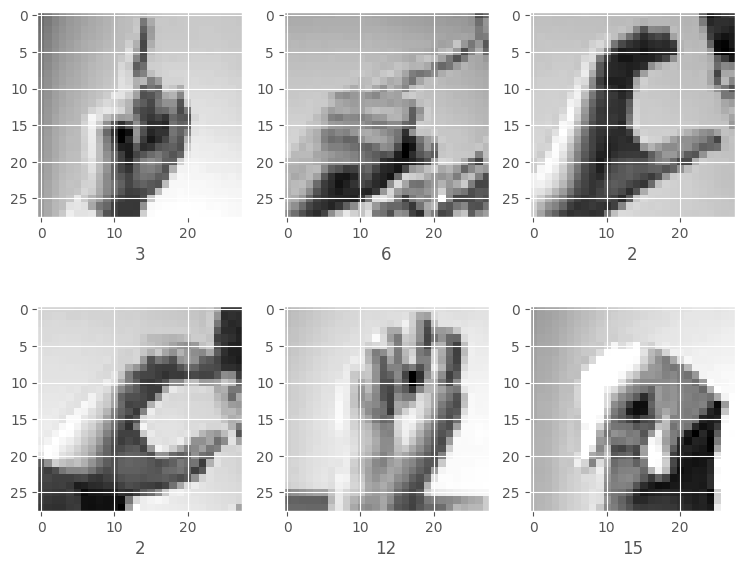

In [46]:
plt.figure(figsize=(9,7))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.xlabel(np.argmax(y_train[i]))
    
plt.show()

Data Augmentation

In [16]:
train_datagen = ImageDataGenerator(rescale=(1./255),rotation_range = 30,
                                  width_shift_range = 0.2,height_shift_range =0.2,
                                  shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))

Model Building

In [17]:
from tensorflow.keras import Sequential
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(28,28,1),activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128,(3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(24,activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

checkpoint = ModelCheckpoint('sign_lan.h5',monitor ='val_acc',verbose=1,save_best_only=True,mode='max')
earlystop = EarlyStopping(monitor = 'val_acc',verbose=1,mode='max')

In [21]:
history = model.fit_generator(generator = train_datagen.flow(x_train,y_train,batch_size=32),
                              validation_data = val_datagen.flow(x_test,y_test),epochs=15,verbose=1)

<ipython-input-21-ae7d289df7e9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train_datagen.flow(x_train,y_train,batch_size=32),


Epoch 1/15
65/65 [==============================] - 13s 171ms/step - loss: nan - accuracy: 0.0449 - val_loss: nan - val_accuracy: 0.0431
Epoch 2/15
65/65 [==============================] - 10s 153ms/step - loss: nan - accuracy: 0.0420 - val_loss: nan - val_accuracy: 0.0431
Epoch 3/15
65/65 [==============================] - 10s 154ms/step - loss: nan - accuracy: 0.0420 - val_loss: nan - val_accuracy: 0.0431
Epoch 4/15
65/65 [==============================] - 10s 161ms/step - loss: nan - accuracy: 0.0420 - val_loss: nan - val_accuracy: 0.0431
Epoch 5/15
65/65 [==============================] - 9s 141ms/step - loss: nan - accuracy: 0.0420 - val_loss: nan - val_accuracy: 0.0431
Epoch 6/15
65/65 [==============================] - 10s 155ms/step - loss: nan - accuracy: 0.0420 - val_loss: nan - val_accuracy: 0.0431
Epoch 7/15
65/65 [==============================] - 10s 153ms/step - loss: nan - accuracy: 0.0420 - val_loss: nan - val_accuracy: 0.0431
Epoch 8/15
65/65 [========================

In [22]:
import warnings
warnings.filterwarnings("ignore")
loss,acc = model.evaluate_generator(val_datagen.flow(x_test,y_test))
print(f"Accuracy: {acc*100}")
print(f"Loss: {loss}")

Accuracy: 4.305850714445114
Loss: nan


In [35]:
x_test = x_test/255.
y_pred = model.predict(x_test)


162/162 [==============================] - 3s 19ms/step


In [36]:
y_te = np.argmax(y_test,axis=1)
y_te

array([ 6,  5,  9, ..., 18, 20,  1])

Model Performance:

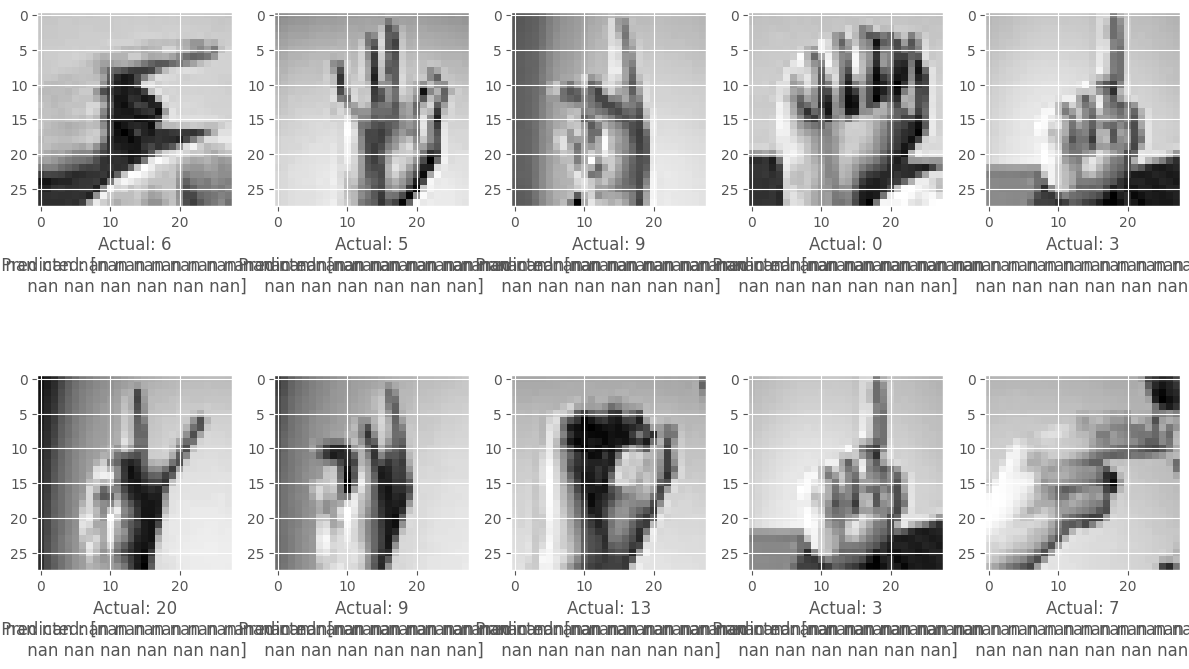

In [47]:
plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i],cmap='gray')
    plt.xlabel(f"Actual: {y_te[i]}\n Predicted: {y_pred[i]}")
    
plt.tight_layout()
plt.show()